# Аналитика данных с помощью `pandas` и `matplotlib`

В этом задании вам предлагается выполнить анализ данных криптовалют с помощью библиотек pandas и matplotlib.
Задание выглядит как лабораторная работа, в которой вам предстоит заполнить недостающие клетки и ответить на ряд вопросов.
 - [Официальная документация pandas](https://pandas.pydata.org/)
 - [Официальная документация matplotlib](https://matplotlib.org/index.html)

> **Напоминание**
>
>Минимальные баллы для получения зачёта по этой работе - **1 балл**. Если вы не набираете тут 1 балл, то по всему курсу вы получаете неуд (см. слайды с вводной презентации).

## 1. Данные (2 балла)

Скачиваем данные для работы:

In [98]:
%%bash
gdown 1e-Q_15W7ExExQarKqgjrtoO-LHi9oJs3

Downloading...
From: https://drive.google.com/uc?id=1e-Q_15W7ExExQarKqgjrtoO-LHi9oJs3
To: /content/coins.csv
100%|██████████| 3.98M/3.98M [00:00<00:00, 148MB/s]


Начнем с необходимых приготовлений.

In [99]:
import numpy as np
import pandas as pd
import matplotlib as mpl  
import matplotlib.pyplot as plt
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е

%matplotlib inline

#### Загрузите заранее подготовленный датасет из файла *"coins.csv"*. Создайте объект типа `pandas.DataFrame` с именем `coins` и в качестве индекса выберите колонку с датой.

In [131]:
coins = pd.read_csv('/content/coins.csv', index_col = "date", parse_dates=True)

Посмотрим что получилось

In [133]:
coins.head(4)

,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
date,,,,,,,,,,,,
2013-04-28,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.0,1.500520e+09
2013-04-28,4.30,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.30,4.40,4.18,4.35,0.0,7.377340e+07
2013-04-29,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.0,1.491160e+09
2013-04-29,4.37,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.37,4.57,4.23,4.38,0.0,7.495270e+07


Поясним значения хранящиеся в колонках
 - date - дата измерений
 - name - полное название монеты
 - symbol - сокращенное название монеты
 - price - средняя цена монеты за торговый день в USD
 - txCount - количество транзакций в сети данной монеты
 - txVolume - объем монет переведенных между адресами в сети данной монеты
 - activeAddresses - количество адресов совершавших а данный день транзации в сети данной монеты
 - open - цена монеты в начале торгов данного дня
 - close - цена монеты в конце торгов данного дня
 - high - самая высокая цена данной монеты в течение данного торгового дня
 - low - самая низкая цена данной монеты в течение данного торгового дня
 - volume - объем торгов данной монетой на биржах в данный день
 - market - капитализация данной монеты в данный день

Изучим полученные данные. Ответьте на следующие вопросы (вставляйте клетки с кодом и тектом ниже):

### 1. Сколько всего различных монет представлено в датасете? (0.4 балла)

In [134]:
coins.name.describe()["unique"]

70

### 2. За какой период данные мы имеем? (0.4 балла)

In [140]:
str(coins.index.min()).split()[0], str(coins.index.max()).split()[0]

('2013-04-28', '2018-06-06')

### 3. Есть ли пропуски в данных? Какой природы эти пропуски, чем они скорее всего вызваны? (0.5 балла)

In [141]:
coins.notnull().value_counts()

price  txCount  txVolume  activeAddresses  symbol  name  open  high  low   close  volume  market
True   True     True      True             True    True  True  True  True  True   True    True      35758
       False    False     False            True    True  True  True  True  True   True    True       1503
False  True     False     True             True    True  True  True  True  True   True    True        310
       False    False     False            True    True  True  True  True  True   True    True         17
dtype: int64

Видно, что есть только три варианта пропусков(последние три строки): во второй строке, вероятно, случаи, когда не производилось никаких транзакций в этот день, поэтому цена известная, а характеристики транзакций не определены. Третья строка, это, возможно, случай, когда не было переводов, но были какие-то ещё транзакции, поэтому txCount определён. Четвертая строка, возможно, случаи, когда данные были потеряны по какой-то причине(таких случаев всего 17)

### 4. У какой монеты и когда была самая высокая цена? (0.2 балла)

In [142]:
coins.sort_values(by=["price"], ascending=False).head(1)

,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
date,,,,,,,,,,,,
2017-12-17,19475.8,391725.0,3.746920e+10,1176110.0,BTC,Bitcoin,19475.8,20089.0,18974.1,19140.8,1.331460e+10,3.261410e+11


### 5. У какой монеты самая высокая и самая низкая суммарная капитализация? Постройте круговую диаграмму с долями. (0.5 балла)

([<matplotlib.patches.Wedge at 0x7fdb45132c10>,
 [Text(-0.21160922895346487, 1.0794542761144263, 'BTC'),
  Text(-0.6046149053894379, -0.9189346093062994, 'ETH'),
  Text(0.21912825010125717, -1.0779530648444584, 'BCH'),
  Text(0.49157829119288904, -0.9840481612339305, 'LTC'),
  Text(0.6207142970444421, -0.9081375234206679, 'ADA'),
  Text(0.7067837894998034, -0.8428859204544218, 'EOS'),
  Text(0.7774081415648687, -0.7782265617599141, 'DASH'),
  Text(0.840598615749508, -0.7095026195864333, 'XEM'),
  Text(0.895182960170029, -0.6392554010888173, 'XLM'),
  Text(0.9418890389316374, -0.5681945426880097, 'NEO'),
  Text(1.0651648454091909, -0.2746340330410904, 'others(each < 1%)')],
 [Text(-0.115423215792799, 0.5887932415169598, '56.2%'),
  Text(-0.32978994839423875, -0.5012370596216178, '19.2%'),
  Text(0.11952450005523117, -0.5879743990060681, '5.8%'),
  Text(0.26813361337793945, -0.5367535424912347, '2.6%'),
  Text(0.33857143475151386, -0.495347740047637, '1.7%'),
  Text(0.38551843063625635, 

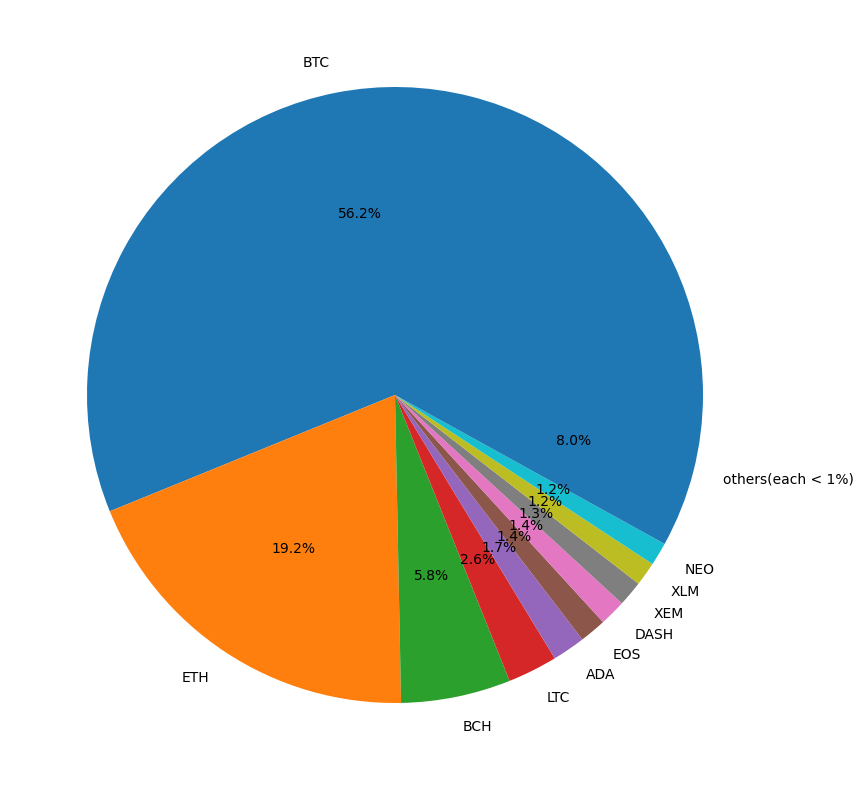

In [185]:
def func(pct):
    return "{:.1f}%".format(pct)

table = coins.groupby("symbol")["market"].agg(sum).sort_values(ascending=False)
new = table[:10]
other_sum = table[10:].sum()
new = new.append(pd.Series(other_sum, index=["others(each < 1%)"]))
plt.figure(figsize=(18, 10))
plt.pie(new, labels=new.index, autopct=func)

In [186]:
table.head(1) # максимум

symbol
BTC    5.743947e+13
Name: market, dtype: float64

In [187]:
table.tail(1) # минимум

symbol
CTXC    1.093502e+10
Name: market, dtype: float64

## 2. Визуализация (1 балл)

Самая интересная часть работы аналитика состоит во внимательном вглядывании в правильно выбранные и построенные графики.

**Реализуйте функцию для визуализации цен выбранной валюты за выбранный диапазон дат.**

На графике должны быть видны цены начала и конца продаж. А так же минимальная и максимальная цена за этот день.
Подпишите график и оси координат. Добавьте сетку. Увеличьте размер изображения.
Можете попробовать использовать `matplotlib.finance.candlestick_ohlc` (`mpl_finance.candlestick_ohlc`), но можно и без него.

In [153]:
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 71 kB 4.0 MB/s 


In [174]:
import mplfinance


def plot_fancy_price_action(coins, symbol, start_date, end_date):
    data = coins[coins["symbol"] == symbol][start_date:end_date]
    mplfinance.plot(data, type="candle", style='charles', xlabel='Date', ylabel='Price',  figsize=(16, 10))

Посмотрим, что получилось:

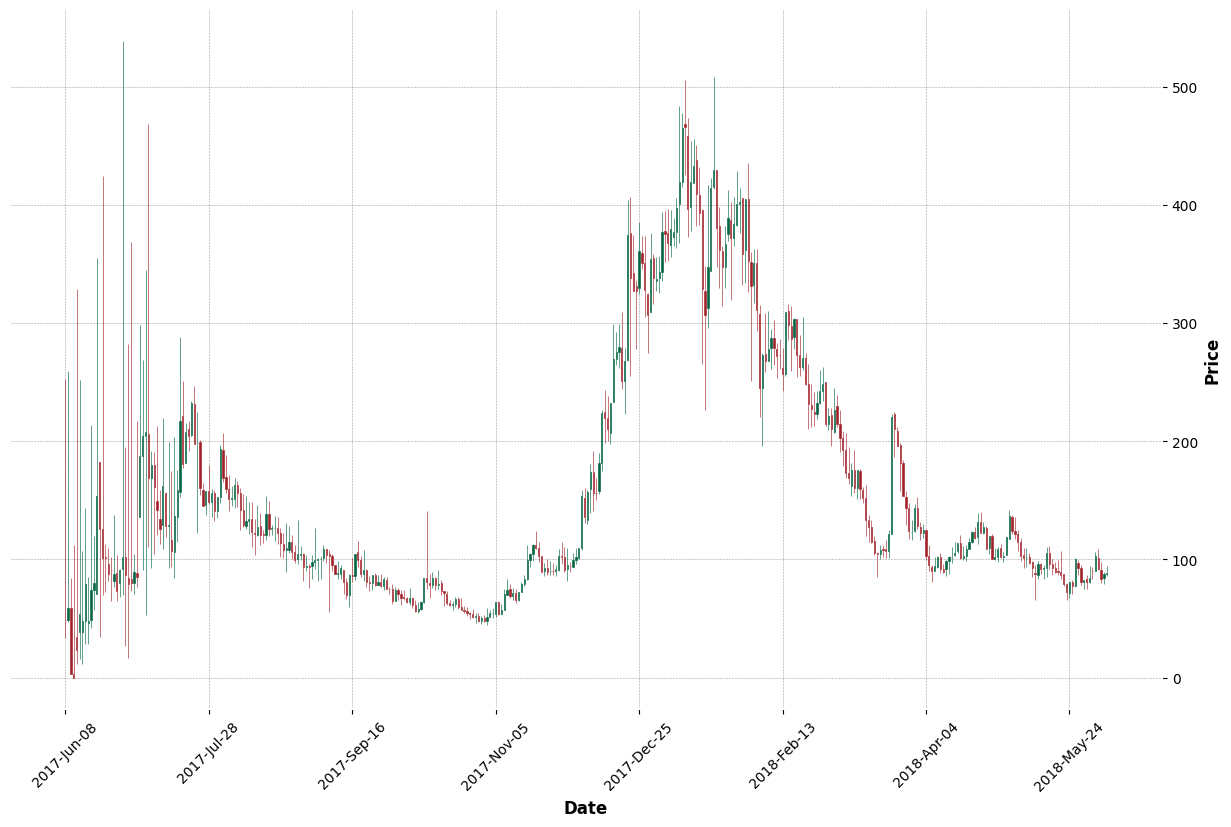

In [175]:
plot_fancy_price_action(coins=coins, symbol='VERI', start_date='2013-06-01', end_date='2019-06-30') 

Никакого датасаенса в этом задании нет. Просто аналитик должен уметь строить графики, либо знать готовые инструменты.

## 3. Накачка и сброс (1 балл)

Криптовалютные биржи до сих пор остаются маргинальным местом, эдаким диким западом финансового мира. Как следствие, здесь процветают схемы относительно
честного отъема денег. Одна из них - **pump'n'dump** (накачка и сброс). 

Она выглядит следуюшим образом. Несколько крупных игроков или много мелких договариваются вместе купить малоизвестную монету с низкой ценой и объемом торгов. Это приводит к мгновенному взлету цены (pump), далее приходят неопытные игроки в надежде успеть заработать на таком росте. В этот момент организаторы схемы начнают все продавать (dump). Весь процесс занимает от нескольких минут до нескольких часов.

Ваша задача -- **найти самый сильный pump'n'dump** монеты на заданном промежутке времени. Для этого для каждого дня определим число `pnd` равное отношению максимальной цены монеты в данный день к максимуму из цен открытия и закрытия в тот же день. Нужно найти день, когда `pnd` был максимален и величину `pnd`.

In [180]:
def find_most_severe_pump_and_dump(coins, symbol, start_date, end_date):
    tmp = coins[(coins.symbol == symbol)][start_date:end_date] 
    tmp.loc[:, "pnd"] = tmp.apply(lambda x: x.high / max(x.open, x.close), axis=1)
    tmp = tmp.sort_values(by="pnd", ascending=False)
    return tmp.head(1).loc[:, ["symbol", "pnd"]]

In [181]:
find_most_severe_pump_and_dump(coins, symbol='BTC', start_date='2017-06-01', end_date='2018-06-01')

,symbol,pnd
date,,
2017-11-29,BTC,1.142894


Сравните эти значения для разных монет:

In [184]:
f = find_most_severe_pump_and_dump
for i in sorted(coins.name.unique(), key=lambda j : f(coins, j, '2013-06-01', '2018-06-01').pnd.iloc[0]):
  print(f"{i}: {f(coins, i, '2013-06-01', '2018-06-01').pnd.iloc[0]}")

CTXC: 1.1428571428571428
USDT: 1.1523809523809523
NAS: 1.1758241758241759
BNB: 1.176079734219269
CENNZ: 1.1777531885963237
BTC: 1.2041014675867432
DRGN: 1.211764705882353
SALT: 1.227206946454414
BAT: 1.2342492522991364
ETH: 1.2508833922261484
ICX: 1.2538461538461536
ZRX: 1.254990051045648
VEN: 1.2713567839195978
ETC: 1.278985507246377
ELF: 1.2808988764044942
ADA: 1.2906403940886697
EOS: 1.3202933985330074
KCS: 1.3243755975664018
OMG: 1.3312148056585635
PAY: 1.3514021619927934
ENG: 1.3618677042801557
AION: 1.3624161073825503
POWR: 1.3641688298886077
ETHOS: 1.3698404867620457
SNT: 1.3861630321910696
MAID: 1.4185410422789304
ZEC: 1.4192894982860704
XEM: 1.4452054794520548
LTC: 1.4549071618037137
POLY: 1.4553773349994372
ZIL: 1.4631857737419598
GAS: 1.477106227106227
REP: 1.477601285025879
WTC: 1.4986168741355463
LOOM: 1.5265126623868979
WAVES: 1.5567891434293681
GNO: 1.653659748974773
QASH: 1.6658378856041132
MTL: 1.6728538283062646
GNT: 1.6882121234525305
CVC: 1.726167450721039
ANT: 1.73

## 4. Окупаемость инвестиций (1 балл)

Вам нужно посчитать **окупаемость инвестиций (ROI)** в криптовалюты на заданном промежутке времени. 

Окупаемость определяется как отношение *изменения цены портфеля* к *исходной цене портфеля*. Цена портфеля - это суммарная стоимость (в USD) всех монет в портфеле.

`investments` - словарь, в котором ключи - это названия монет, значения - это сумма вложений в эту монету (в USD).

In [116]:
def compute_roi(coins, investments, start_date, end_date):
    sum_1 = 0
    for i in investments:
        sum_1 += investments[i] * coins[(coins.symbol == i) & (coins.date == start_date)].iloc[0].loc["price"]
    sum_2 = 0
    for i in investments:
        sum_2 += investments[i] * coins[(coins.symbol == i) & (coins.date == end_date)].iloc[0].loc["price"]
    return (sum_2 - sum_1) / sum_1
    

In [117]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2018-04-04', end_date='2018-06-01')

0.004831614576721986

In [118]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2013-05-28', end_date='2018-06-06')

57.53575236064575

## 5. Технический анализ (1 балл)

**Технический анализ** - это способ предсказания поведения графика по некоторым вспомогательным величинам построенным по исходному графику. Один из простейших методов технического анализа - **[границы Боллинджера](https://en.wikipedia.org/wiki/Bollinger_Bands)**. Кто-то верит, что график касаясь границы от него должен отражаться.

Границы считаются очень просто: 

$$(MA \pm K\sigma),$$

где `MA` - скользящее среднее за `N` дней, а $\sigma$ - скользящее стандартное отклонение за `N` дней.

Нарисуйте **график цены**, **скользящее среднее** и **границы Боллинджера** c параметрами `N (window) = 21`, `K (width) = 2`.

Тут вам поможет функция `rolling` для подсчёта среднего и стандартного отклонения по скользящему окну.

Не забудьте подписать график и оси, отрисовать легенду и выбрать для нее лучшее расположение.

In [201]:


def plot_bollinger_bands(coins, symbol, window, width):
    tmp = coins[coins.symbol == symbol]
    roll = tmp.price.rolling(window=window)
    tmp["mean"] = roll.mean()
    tmp["std"] = roll.std()
    tmp["lower_bound"] = tmp["mean"] - width * tmp["std"]
    tmp["upper_bound"] = tmp["mean"] + width * tmp["std"]

    plt.figure(figsize=(12, 5))
    ax = plt.axes()
    ax.grid(True)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price, USD")
    ax.set_title(f"Price of {coins[coins.symbol == symbol].name.iloc[0]}")
    plot = tmp[["price", "lower_bound", "upper_bound"]].plot(ax=ax)
    ax.legend()
    


<ipython-input-201-6848ef3e0cdd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["mean"] = roll.mean()
<ipython-input-201-6848ef3e0cdd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["std"] = roll.std()
<ipython-input-201-6848ef3e0cdd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

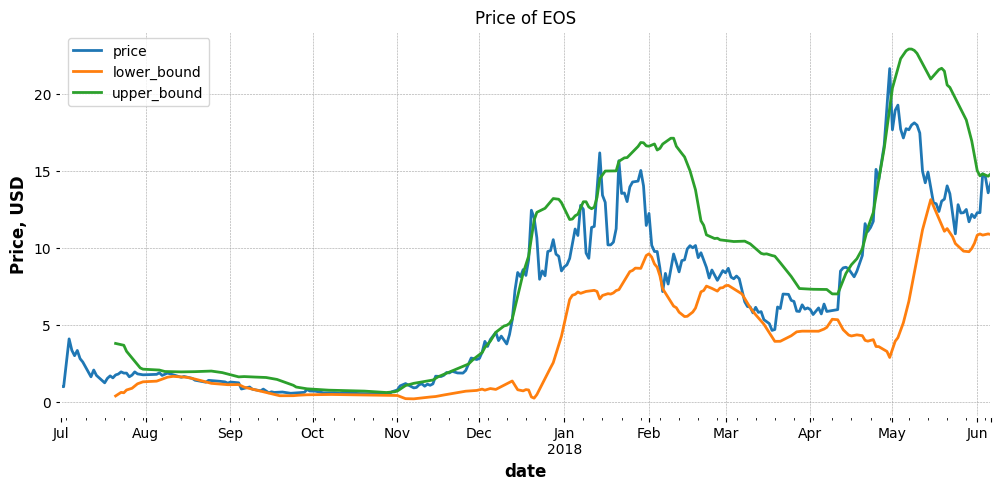

In [202]:
plot_bollinger_bands(coins=coins, symbol='EOS', window=21, width=2)  # тут должен появиться график

**Сделайте вывод о том, выполнялось ли правило Боллинджера:**

**График, касаясь границы не отражается от неё мгновенно, но глобально отражается**

## 6. Капитализация как индикатор (1 балл)

Многие люди, которые торгуют криптовалютой, любят смотреть на [капитализацию](https://academy.binance.com/ru/articles/crypto-market-capitalization-explained). Давайте поймём почему.

**Нарисуйте еще два графика:**
1. общая капитализация биткойна (BTC), эфира (ETH), еос (EOS), биткойн кэша (BCH), стеллара (XLM) и лайткойна (LTC)
2. доли капитализаций этих монет от общей капитализации рынка. 

При этом используйте данные начиная с 2017-07-01.

In [228]:
def plot_coins_capitalizations(coins, symbols, start_date):
    data = coins[start_date:]
    total_market_per_day = data.groupby(by='date').sum()["market"]
    data["market_share_by_total"] = data["market"] / total_market_per_day
    ax = plt.axes()
    for symbol in symbols:
      data[data.symbol == symbol].plot(y="market", ax=ax, label=symbol, xlabel="Date", ylabel="Market Capitalize", figsize=(13, 7))
    plt.show()
    ax = plt.axes()
    for symbol in symbols:
      data[data.symbol == symbol].plot(y="market_share_by_total", ax=ax, label=symbol, xlabel="Date", ylabel="Market Share", figsize=(13, 7))
    plt.show()
    

<ipython-input-228-48f334014041>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["market_share_by_total"] = data["market"] / total_market_per_day


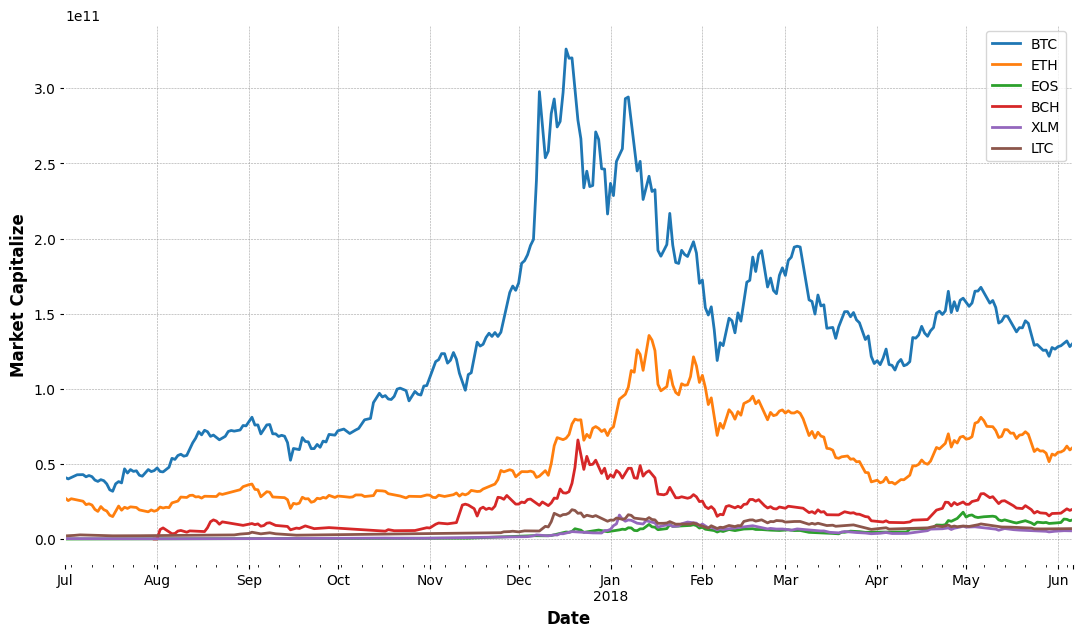

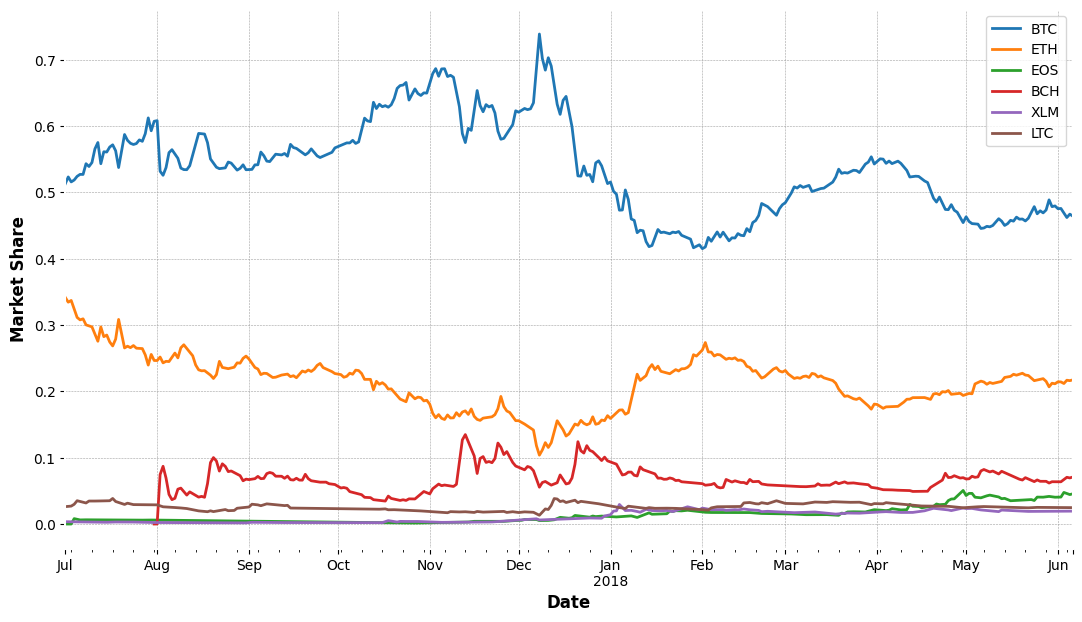

In [230]:
plot_coins_capitalizations(
    coins=coins,
    symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'),
    start_date='2017-07-01'
)

Проанализируйте зависимость доли капитализации альткойнов (остальных монет, кроме биткойна) от доли капитализации биткойна. Как выдумаете, в чём причина такой зависимости?


**Поскольку биткоин является самой популярной криптовалютой и криптовалютой с максимальной долей рынка, его падения и подъёмы отражаются на всех остальных монетах рынка**

## 7. Корреляции монет (1 балл)

Теперь нужно подробнее посмотреть на корреляции средних долей капитализаций монет. При этом будем смотреть на среднее сглаженное за последние `window` дней до дня `date` с коэффициентом сглаживания `alpha` для набора монет `symbols`.

Реализуйте функцию, которая будет возвращать квадратный `DataFrame` с числом строк и столбцов, равным числу рассматриваемых монет и со значениями корреляций:

In [252]:
def calc_coins_correlations(coins, date, symbols, window, alpha):
    data = coins[pd.Timestamp(date) + pd.DateOffset(-window):date]
    data = data[data.symbol.isin(symbols)].loc[:, ["symbol", "price"]]
    mean_dict = dict()
    for symbol in symbols:
       ser = pd.Series(data[data.symbol == symbol].price.ewm(alpha=alpha).mean())
       mean_dict[symbol] = ser
    return pd.DataFrame(mean_dict).corr()

In [253]:
correlations = calc_coins_correlations(coins, date="2018-06-06",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-253-5cb301b2dfa8>:5: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlations.style.background_gradient(cmap='coolwarm').set_precision(2)


,BTC,ETH,EOS,BCH,XLM,LTC,ADA
BTC,1.00,1.00,0.56,0.99,0.98,1.00,0.98
ETH,1.00,1.00,0.56,0.98,0.97,1.00,0.98
EOS,0.56,0.56,1.00,0.58,0.56,0.56,0.62
BCH,0.99,0.98,0.58,1.00,1.00,0.99,0.99
XLM,0.98,0.97,0.56,1.00,1.00,0.98,0.99
LTC,1.00,1.00,0.56,0.99,0.98,1.00,0.99
ADA,0.98,0.98,0.62,0.99,0.99,0.99,1.00


Довольно интересно ещё взглянуть на 2017-12-27:

In [254]:
correlations = calc_coins_correlations(coins, date="2017-12-27",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-254-c2d058096282>:5: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlations.style.background_gradient(cmap='coolwarm').set_precision(2)


,BTC,ETH,EOS,BCH,XLM,LTC,ADA
BTC,1.00,0.67,0.61,0.41,0.65,0.78,0.54
ETH,0.67,1.00,0.99,0.91,0.97,0.98,0.96
EOS,0.61,0.99,1.00,0.95,0.99,0.94,0.98
BCH,0.41,0.91,0.95,1.00,0.94,0.82,0.97
XLM,0.65,0.97,0.99,0.94,1.00,0.93,0.99
LTC,0.78,0.98,0.94,0.82,0.93,1.00,0.89
ADA,0.54,0.96,0.98,0.97,0.99,0.89,1.00


## 8. Анализ одной стратегии (2 балла)

Разберем один мечтательный пример. Посмотрим какую прибыль могла бы нам принести хрестоматийная торговая стратегия, основанная на скользящих средних.

Стратегия выглядит следующим образом: мы строим две скользящие среднии для графика цены. С маленьким окном (ведущее скользящее среднее) и с бОльшим окном (запаздывающее скользящее среднее). **Мы покупаем, когда ведущее среднее становится больше запаздывающего, и продаем в противном случае.**

Посмотрим на пример:

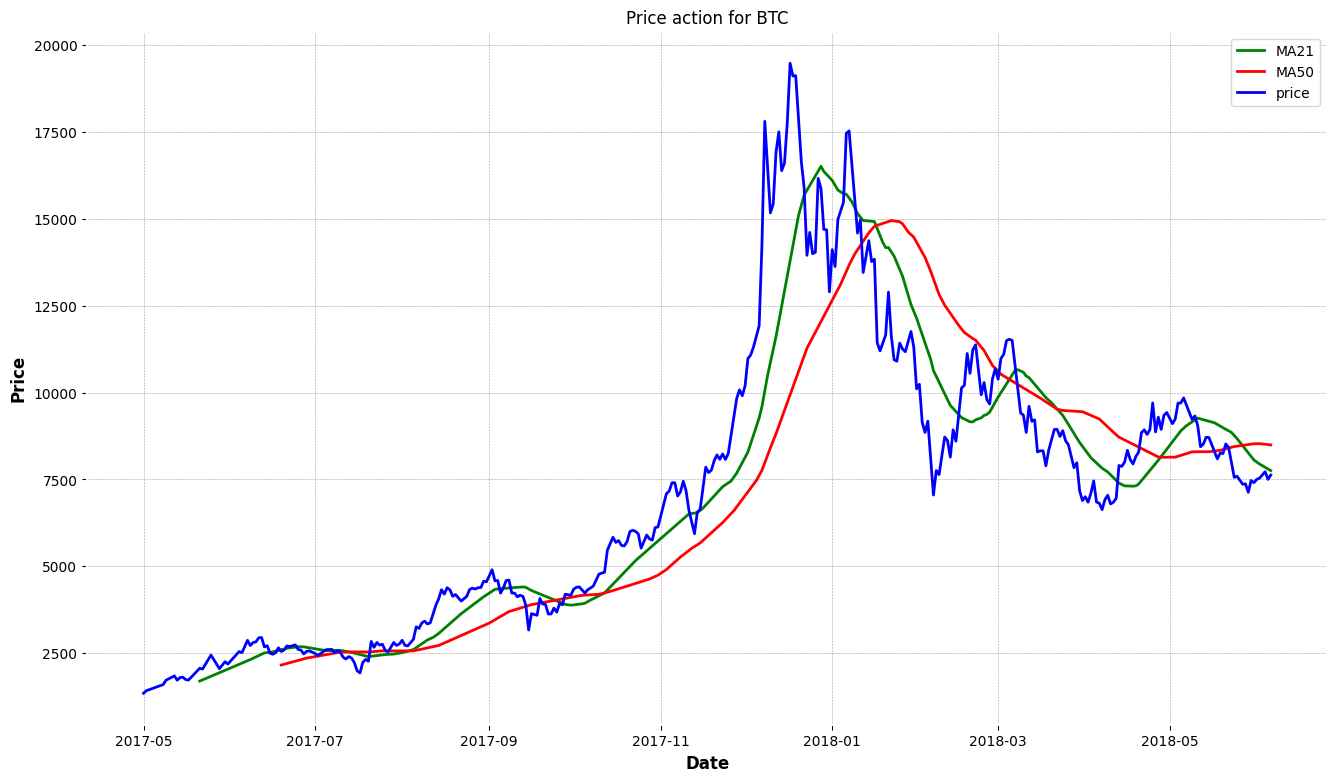

In [249]:
def plot_moving_averages(coins, symbol, leading_window, lagging_window, start_date, end_date):
    coin = coins[coins['symbol'] == symbol][start_date:end_date]
    price = coin['price']
    leading_mean = price.rolling(window=leading_window).mean()
    lagging_mean = price.rolling(window=lagging_window).mean()

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)
    
    ax.set_title('Price action for {}'.format(symbol))
    ax.plot(leading_mean, color='green', label='MA{}'.format(leading_window))
    ax.plot(lagging_mean, color='red', label='MA{}'.format(lagging_window))
    ax.plot(price, color='blue', label='price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')
    ax.grid(True)
    plt.show() 

plot_moving_averages(
    coins=coins, 
    symbol='BTC', 
    leading_window=21, 
    lagging_window=50, 
    start_date='2017-05-01',
    end_date='2018-08-01')

Видно, что скользящее среднее с бОльшим окном медленнее реагирует на изменение цены. Именно на этой идее и основана торговая стратегия.


**Реализуйте функцию**, которая строит два графика. На правом будут изображены цена и скользящие средние. На левом - во сколько раз изменится размер вложений при использовании нашей стратегии и при обычном инвестировании (купили и держим, смотрим как растет цена наших купленных валют).

>**Примечания:**
>- Давайте использовать только цены закрытия. При этом, чтобы узнать цены за вчерашний день, стоит использовать метод `shift(1)` у `Series`.
>- Отношение цен закрытия за сегодня и за вчера - это **multiplier** за сегодняшний день. При этом давайте строить графики накопления для multiplier-ов. Т.е. если мы смотрим на 3 дня и в первый день multiplier = 1.5, во второй - 0.5 и в третий - 2, то график будет выглядеть так: (1.5, 1.5 * 0.5, 1.5 * 0.5 * 2).
>- При использовании нашей новой стратегии мы будем либо покупать, если ведущее среднее становится больше запаздующего на некоторый `threshold` (при этом лучше разницу сперва поделить на цену), либо оставлять всё как есть. При этом, конечно, нужно, принимая решения за сегодняшний день, смотреть только на статистику из прошлого.

In [289]:

def true_func():
      return True
      
def false_func():
      return False

In [299]:
def plot_moving_averages_strategy(
    coins, symbol, lead_window, lag_window, threshold, start_date, end_date
):
    data = coins[coins.symbol == symbol][start_date:end_date]
    figure = plt.figure(figsize=(14, 7))
    left_plot = figure.add_subplot(1, 2, 1)
    right_plot = figure.add_subplot(1, 2, 2)
    data["lead"] = data.close.rolling(lead_window).mean()
    data["lag"] = data.close.rolling(lag_window).mean()
    data["multiplier"] = data.close / data.close.shift(1)
    data["multiplier"].cumprod().plot(ax=left_plot)
    data["buy_by_strategy"] = (data.lead - data.lag) / data.close > threshold
    data[["close","lead", "lag"]].plot(ax=right_plot)
  
    data["strategy_multiplier"] = np.where(data["buy_by_strategy"], data["multiplier"], 1)
    data["strategy_multiplier"].cumprod().plot(ax=left_plot).legend(["multiplier", "average multiplier"])
    plt.legend()

In [300]:
# Теперь на основе реализованной функции сделаем интерактивные графики и поизучаем, что получилось:
symbol_selector = ipywidgets.Dropdown(
    options=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'),
    index=0,
    value='BTC',
    layout={'width': '700px'},
    continuous_update=False
)

lead_window_slider = ipywidgets.IntSlider(
    value=21, 
    min=1, 
    max=200, 
    step=1,
    layout={'width': '700px'},
    continuous_update=False)

lag_window_slider = ipywidgets.IntSlider(
    value=50,
    min=1, 
    max=200, 
    layout={'width': '700px'},
    step=1, continuous_update=False)

threshold_slider = ipywidgets.FloatSlider(
    min=0, 
    max=0.20, 
    step=0.001, 
    value=0.025,
    layout={'width': '700px'},
    continuous_update=False)

start_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2017-05-01'),
    layout={'width': '700px'},
    continuous_update=False
)

end_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2018-01-01'),
    layout={'width': '700px'},
    continuous_update=False
)

ipywidgets.interact(
    plot_moving_averages_strategy,
    coins=ipywidgets.fixed(coins),
    symbol=symbol_selector,
    lead_window=lead_window_slider,
    lag_window=lag_window_slider,
    threshold=threshold_slider,
    start_date=start_date_slider,
    end_date=end_date_slider
)

interactive(children=(Dropdown(description='symbol', layout=Layout(width='700px'), options=('BTC', 'ETH', 'EOS…

<function __main__.plot_moving_averages_strategy(coins, symbol, lead_window, lag_window, threshold, start_date, end_date)>

Попробуйте разные значения параметров для разных монет и сделайте выводы о применимости такой модели:

**Такая стратегия оказывается устойчивой к сильным падениям криптовалюты,
но из-за этого не так быстро реагирует на подъёмы. Подобрав параметры, для lead=7, для lag=31, получилось заработать больше на многих криптовалютах на периодах средней длины, особенно хорошо такая стратегия проявляет себя там, где происходят большие падения, поскольку она их обрезает и зарабатывает больше**

## 9. Отказ от ответственности 

Все примеры разобранных здесь стратегий являются игрушечными и не подходят для реальной торговли на бирже. Без серьезной подготовки вас там съедят с потрохами.